### Computer Programming Sample Final Project

**January 2022**


**Background** 

The project below contains an assignment task description and respective code written for a final project of a computer programming course in January 2022. The code analyses historical match data from Women's tennis tournaments from 2007 to 2021 utilising only fundamental Python data types in order to obtain insights on rankings and to generate an alternative ranking algorithm on players based on matches won or lost within specified time periods.

---

## Fifteen Years of Women's Tennis

The final assignment asks you to use the computational thinking and programming skills you learned in the course to answer an empirical social science question. You are expected to apply the best practices and theoretical concepts we covered in the course to produce a program that not only returns the correct output but is also legible, modular, and reasonably optimized. The assignment assumes mastery of loops, conditionals, and functions, as well as awareness of issues related to runtime performance.

In honor of Emma Raducanu's historical achievements this year, we will study the results of womens' tennis matches over the period 2007-2021. Your objectives are to parse the data, reconstruct tournament brackets, identify the top players, and implement an algorithm to provide an alternative ranking for the players.

**NOTE: You are only allowed to use fundamental Python data types (lists, tuples, dictionaries, numpy.ndarray, etc.) to complete this assignment.** You are not allowed to use advanced data querying and data analysis packages such as pandas, sqlite, networkx, or similar. We impose this restriction in order to test your grasp of fundamental programming concepts, not your scripting experience with Python libraries you acquired from prior work or other courses. 

### Data

The data repository contains fifteen `.csv` files with match results, one file for each year. Each file contains the following variables:

* Tournament – the name of the tournament that the match was part of.
* Start date – the date when the tournament starts.
* End date – the date when the tournament ends.
* Best of – 3 means that first player to win 2 sets wins match (all WTA matches are best of 3 sets).
* Player 1, Player 2 – names of the players in the match.
* Rank 1, Rank 2 – WTA ranks of Player 1 and Player 2 before the start of the tournament. Not all players will have a ranking.
* Set 1-3 – result for each set played where the score is shown as: number of games won by Player 1 - number of games won by Player 2. The player that wins the most games in a set wins that set.
* Comment
  * Completed means match was played.
  * Player retired means that the named player withdrew and the other player won by default.


### 1. Reconstructing the tournaments

Tournaments in tennis are typically in knockout format. In each round there are several pairs of fixtures, the winners of each match advance to the next round and the losers are eliminated. The winners then proceed to the next round and the process continues until two players contest the final. Typically, the rounds in the competition go as follows: \[`First Round`, `Second Round`, ...,\] `Quarterfinals`, `Semifinals`, `Final`.

In some cases, tournaments have a `Round Robin` (also known as all-play-all) group stage, meaning that each player in a group plays against each other player in turn. There are usually two parallel groups with 4 players in each. The top player(s) (i.e. those who won the most matches) in each group advance to a short knockout stage (typically just Semifinals and Final). These tournaments are:

* Sony Ericsson Championships 2007-2015
* Commonwealth Bank Tournament of Champions 2009
* Qatar Airways Tournament of Champions Sofia 2012
* Garanti Koza WTA Tournament of Champions 2013-2014
* BNP Paribas WTA Finals 2016-2018
* WTA Elite Trophy 2015-2019
* WTA Finals 2019, 2021

Very occasionally, tournaments also include a `Third Place` match too.

Your task is to identify the winner in each match and the round in which the match was played. To check your work, please call the procedures you have writen to print the answers to the following questions:

* Who won the final of the 2021 Women's US Open?
* Who played against whom in the 4th Round of the 2018 French Open? 
* In which round was Venus Williams eliminated in the 2011 Australian Open?
* How many finals has Naomi Osaka played in until now?
* How many times have Venus and Serena Williams played against each other and how many of these matches each won?

### 2. Winners win

One simple and naive way to rank players is to count how many matches they won each year. Write a procedure that estimates this. Then print the three top ranked players for the year 2021 and for the period 2007-2021, together with the total number of matches they won. Higher scores are better, so ranking is the reversed order of most matches won.


### 3. Winners don't lose

A more sophisticated ranking algorithm will account for the fact that some players may play fewer games (e.g., due to an injury) and that wins in later stages of a tournament (e.g., in the final and semi-final compared to earlier rounds of the competition) are more important. Write another procedure that estimates a player's rank by adding `r` points for every win and subtracting `1/r` for every loss, where `r = 1` for the lowest elimination round of the tournament, `r = 2` for the next round of the tournament, and so on. In other words, `r` starts at 1 and increases for every next elimination round. This way, winning larger competitions brings more points (they have more elimination rounds), wins in later rounds improve one's rank more, and losses in earlier rounds diminish one's rank more. For round-robin stage matches, assume that `r = 1`. 

Use this measure to print the three top ranked players for the year 2021 and for the period 2007-2021, together with their scores.


### 4. Winners beat other winners (WbW)

Another idea for ranking players is that winning over better players should count more. However, how we measure a good player depends on whether they beat other good players, so we get into a recursive situation. Do not worry, you will not have to write a recursive procedure here as every recursive solution can be rewritten as iteration! This is what we will do:

1. First, count all the players in the given data and assign each a score of 1/n, where n is the number of unique players.

2. Then, repeatedly do the following sequence of steps:
    1. Each player divides its current score equally among all the matches they have lost and passes these shares onto the players they lost to. If the player never lost, then they pass their current score to themselves. If the player lost two times to a specific individual, then they pass two shares to that individual.   
    2. Each player updates their score to be the sum of the shares they receive.    
    3. Rescale the score of each player by multiplying it by 0.85 and adding 0.15/n.
    
3. Repeat the procedure until adjustments are too small to matter. You may need to come up with modifications of the algorithm or the data if the algorithm cannot converge or produces non-sensical results in specific situations.

This algorithm essentially starts with a world in which everyone is equally important and then starts to "pass importance" iteratively to the winners until an equilibrium is reached.

Use this measure, which we will call WbW, to print the three top ranked players for the year 2021 and for the period 2007-2021, together with their scores. 


### 5. Compare your WbW ranking measure

In fact, the data already contain the players' official WTA rank in the variables Rank1 and Rank2, which follows its own [complex procedure](https://en.wikipedia.org/wiki/WTA_Rankings). How well does your WbW ranking correlate with the WTA ranking over time? 

Use the data from 2007 to estimate the players' WbW ranking at the end of this year. This will give you sufficient data to initialize your estimate. 

Then, starting with 2008, update your ranking before the start of each tournament, based only on results from tournaments completed in the previous 52 weeks. Use a scatter plot from `matplotlib` to plot the players' WTA ranking on the x-axis against your WbW ranking calculated before the start of the same tournament on the y-axis. If an individual's WTA ranking changes mid-tournament (rare), take their first listed ranking within that tournament. Each point on the plot should be a player's ranking before the start of each tournament for each tournament they participated in from 2008 until now. So the number of points to plot will be the number of unique individuals that took part in each tournament for all tournaments during that period.

Write a couple of sentences to note what you observe. You will not be marked for your observations but some reflection is important as it could help you identify problems with your code, for example.


## Import and run your code here

Keep your code in separate `.py` files and then import it in the code cell below. Then call the functions/methods you need to conduct the analysis described above and print the requested outputs. We should be able to run the cell below to calculate again the results and get the requested output, without having to modify your code in any way. 

Raducanu E. won the Finals of the 2021 US Open
Keys M. played against Buzarnescu M. in Round 4 of the 2018 French Open
Putintseva Y. played against Strycova B. in Round 4 of the 2018 French Open
Stephens S. played against Kontaveit A. in Round 4 of the 2018 French Open
Halep S. played against Mertens E. in Round 4 of the 2018 French Open
Kasatkina D. played against Wozniacki C. in Round 4 of the 2018 French Open
Kerber A. played against Garcia C. in Round 4 of the 2018 French Open
Sharapova M. played against Williams S. in Round 4 of the 2018 French Open
Muguruza G. played against Tsurenko L. in Round 4 of the 2018 French Open
Williams V. was eliminated in Round 3 of the 2011 Australian Open
Osaka N. has played in 15 Finals
Williams V. and Williams S. played in a total of 18 matches together where Williams V. won 6 matches and Williams S. won 12 matches.
From 2021 to 2021 the top 3 are:
Rank 1 : Kontaveit A., 49 points
Rank 2 : Jabeur O., 48 points
Rank 3 : Sabalenka A., 44 points
From

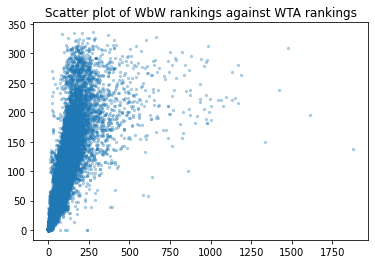

In [1]:
# Import modules to estimate and show results

import get_data, edit_data, get_rounds, update_rounds, p1_matches, p2_ranks_ww
import p3_ranks_wdl, p4_ranks_wbw, p5_ranks_wta_wbw

# Call functions
data = get_data.read_data() # Read data
data = edit_data.update_all(data) # Update data with edits to names, dates and winners
data_tourn, match_counts = get_rounds.get_match_counts(data) # Get match counts per player
data_tourn = get_rounds.get_rounds(data_tourn, match_counts) # Get round numbers for each match and update data 
data_tourn = update_rounds.update_rounds(data_tourn) # Update data with corrected round numbers and labels

# Problem 1
# Q1
winners_losers = p1_matches.ans_players1(data_tourn, 'US Open', 2021, 'Finals')
print(winners_losers[0][0], "won the Finals of the 2021 US Open")

# Q2
p1_matches.ans_players2(data_tourn, 'French Open', 2018, 'Round 4')

# Q3
p1_matches.rnd_lost(data_tourn, 'Australian Open', 2011, 'Williams V.')

# Q4
p1_matches.ans_nrounds(data_tourn, 'Osaka N.', 'Finals')

# Q5
p1_matches.ans_pvp(data_tourn, 'Williams V.', 'Williams S.')

# Problem 2
data_year = p2_ranks_ww.group_data_year(data_tourn) # Group data to obtain matches ordered by year 
p2_ranks_ww.print_ww(data_year, 2021, 2021, 3) # Print rankings in 2021
p2_ranks_ww.print_ww(data_year, 2007, 2021, 3) # Print rankings from 2007-2021

# Problem 3
p3_ranks_wdl.print_wdl(data_year, 2021, 2021, 3) # Print rankings in 2021
p3_ranks_wdl.print_wdl(data_year, 2007, 2021, 3) # Print rankings from 2007-2021

# Problem 4 
p4_ranks_wbw.print_wbw(data_tourn, 2021, 2021, 3) # Print rankings in 2021
p4_ranks_wbw.print_wbw(data_tourn, 2007, 2021, 3) # Print rankings from 2007-2021

# Problem 5
tourns_2008_2021 = p5_ranks_wta_wbw.tourns_start(data_tourn, 2008)
p5_ranks_wta_wbw.plot_wta_wbw(data_tourn, tourns_2008_2021) # Print scatter plot

# The scatter plot shows a strong positive correlation between the estimated WBW rankings and
# WTA rankings for stronger players who are highly ranked (with lower rank values below 250), where most points
# have WBW rankings closely approximate the WTA rankings. This correlation weakens as rank number increases as shown by the increasing 
# spread of values and extreme WBW values.

In [2]:
# Test code

data_tourn.keys()
for y, t in [(2017, 'J&T Banka Prague Open'),
            (2021, 'WTA Finals'),
            (2019, 'WTA Finals'),
            (2009, 'Sony Ericsson Championships'),
            (2015, 'WTA Elite Trophy'),
            (2016, 'WTA Elite Trophy'),
            (2010, 'Commonwealth Bank Tournament of Champions')]:
    print('\n', y, t)
    print('\n'.join(['\t'.join((str(x['Round_n']+1), x['Player 1'], x['Player 2']))
                     for x in data_tourn[(y, t)]][::-1]))
    


 2017 J&T Banka Prague Open
6	Barthel M.	Pliskova Kr.
5	Ostapenko J.	Pliskova Kr.
4	Ostapenko J.	Konjuh A.
5	Strycova B.	Barthel M.
4	Pliskova Kr.	Haddad Maia B.
4	Strycova B.	Siniakova K.
4	Giorgi C.	Barthel M.
3	Vondrousova M.	Konjuh A.
3	Wozniacki C.	Ostapenko J.
3	Strycova B.	Hradecka L.
3	Haddad Maia B.	Stosur S.
3	Pliskova Kr.	Safarova L.
3	Siniakova K.	Vikhlyantseva N.
3	Wang Q.	Giorgi C.
3	Dodin O.	Barthel M.
2	Safarova L.	Kucova K.
2	Konjuh A.	Cepelova J.
2	Ostapenko J.	Tsurenko L.
2	Siniakova K.	Kovinic D.
2	Jankovic J.	Pliskova Kr.
2	Zhang S.	Barthel M.
2	Golubic V.	Vikhlyantseva N.
2	Goerges J.	Strycova B.
2	Linette M.	Hradecka L.
2	Rodina E.	Stosur S.
2	Haddad Maia B.	Mchale C.
2	Wozniacki C.	Doi M.
2	Wang Q.	Sakkari M.
2	Giorgi C.	Pliskova Ka.
2	Beck A.	Dodin O.
2	Witthoeft C.	Vondrousova M.

 2021 WTA Finals
4	Kontaveit A.	Muguruza G.
3	Sakkari M.	Kontaveit A.
3	Badosa P.	Muguruza G.
2	Sakkari M.	Sabalenka A.
2	Badosa P.	Swiatek I.
4	Kontaveit A.	Muguruza G.
2	Pliskova 